# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [88]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))

# I found the end of the introduction via trial-and-error, as per the print statement below
# print(macbeth[:16706]) 

# The introduction by the Project Gutenberg contrinutes continues until char #16706
# So I remove this "non-Shakespeare" text prior to working with the text
macbeth = macbeth[16706:]
print(len(macbeth))

<class 'str'>
120253
103547


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

In [67]:
# Format the entire text to lowercase to avoid duplicates such as "the" and "The"
macbeth = macbeth.lower()

In [68]:
# Investigating instances of "Macb" in my graph
# Using the string.find(value, start, end) method
# macb = []
# pos = macbeth.find('macb', 0)
# macb.append(macbeth[pos-20:pos+20])
# while pos < len(macbeth)-30:
#     pos = macbeth.find('macb', pos+1)
#     macb.append(macbeth[pos-20:pos+20])
# print(macb)

<function matplotlib.pyplot.show(*args, **kw)>

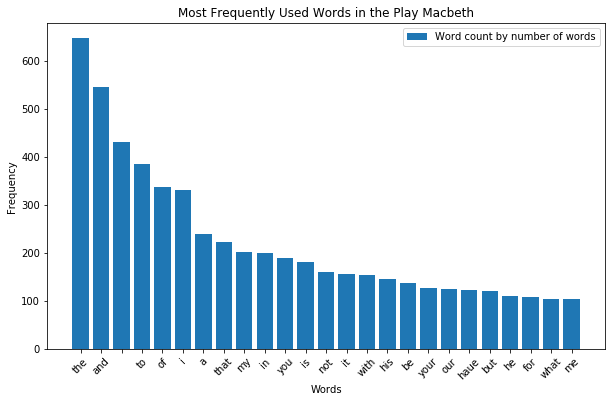

In [69]:
# Pseudo-code Outline
# Split the transcript into words
# Create a dictionary
# Iterate through the text of Macbeth
# Update word counts
# Create Bar Graph
# Include descriptive titles and labels

# Questions
# How to find docstrings on a dictionary method (as opposed to a function)
# To get docstrings, need to put the dictionary name and then the method
# e.g. macbeth_word_count.get() <-- Shift+Tab inside there


macbeth_word_count = {}
# Question - How do you replace more than one or group of characters?
# macbeth_fixed = macbeth.replace()
# macbeth_fixed  = macbeth.replace(str_split('\\/:*?"<>|,'), '')

macbeth = macbeth.replace('.', '')
macbeth = macbeth.replace(',', '')
macbeth = macbeth.replace('\r', ' ')
macbeth = macbeth.replace('\n', ' ')
macbeth = macbeth.replace('   ', ' ')
macbeth = macbeth.replace('  ', ' ')
macbeth_list = macbeth.split(' ')
for word in macbeth_list:
    word_formatted = word.lower()
    if macbeth_word_count.get(word_formatted) == None:
        macbeth_word_count[word_formatted] = 1
    macbeth_word_count[word_formatted] = macbeth_word_count.get(word_formatted) + 1

# removing Macb. as this is referring to the role of Macbeth
# and is not a word in the actual play
del macbeth_word_count['macb']

sorted_macbeth_word_count = sorted(macbeth_word_count.items(), key=lambda kv: kv[1], reverse=True)

x_values = list(map(lambda k: k[0], sorted_macbeth_word_count))
y_values = list(map(lambda k: k[1], sorted_macbeth_word_count))


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.bar(x_values[:25], y_values[:25], label='Word count by number of words')
plt.xticks(rotation=45)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title("Most Frequently Used Words in the Play Macbeth")
plt.legend()
plt.show

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!

## Creating a list of top characters by mentions of their names

In [19]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text
macbeth = macbeth[16706:]
print(len(macbeth))

103547


In [20]:
macbeth = macbeth.replace('\n', ' ')
macbeth = macbeth.replace('\r', ' ')
# macbeth = macbeth.lower()
macbeth_words = macbeth.split(' ')
macbeth_words_ending_in_period = list(filter(lambda x: x.endswith('.'), macbeth_words))
macbeth_possible_characters = list(filter(lambda x: x.capitalize() == x, macbeth_words_ending_in_period))

In [21]:
macbeth_words_ending_in_period[:25]
len(macbeth_words_ending_in_period)
macbeth_possible_characters[:25]
len(macbeth_possible_characters)
possibly_not_a_character = []
for word in macbeth_words_ending_in_period:
    if word not in macbeth_possible_characters:
        possibly_not_a_character.append(word)
# print(possibly_not_a_character)
# After reviewing "possibly_not_a_character, it looks like I missed 1.Murth, 2.Murth, and Y.Sey

In [22]:
names = {}
for word in macbeth_possible_characters:
    if word in names:
        names[word] += 1
    else:
        names[word] = 1
names_sorted = sorted(names.items(), key=lambda kv: kv[1], reverse=True)
names_sorted = list(map(lambda k: k[0], names_sorted))

In [23]:
print(names_sorted)

['Macb.', 'Macd.', 'Lady.', 'Rosse.', 'Exeunt.', 'Mal.', 'Banq.', '1.', 'La.', 'Lenox.', 'Doct.', 'Wife.', 'King.', 'Malc.', '3.', 'Son.', 'All.', 'Sey.', '2.', 'Gent.', 'Mac.', 'Macbeth.', 'Knock.', 'Enter.', 'Ban.', 'Seruant.', 'Mur.', 'Thunder.', 'Banquo.', 'Macduffe.', 'Secunda.', 'Tertia.', 'Flourish.', 'Attendants.', 'Lords.', 'Lord.', 'Len.', 'Ment.', 'Witches.', 'Ang.', 'Quarta.', 'Messenger.', 'Prima.', 'Kings.', 'Appar.', 'Mes.', 'Colours.', 'Cap.', 'Angus.', 'Cawdor.', 'Quinta.', 'Sexta.', 'Knocke.', 'Porter.', 'Port.', 'Night.', 'Murtherers.', 'Murth.', 'Lad.', 'Cath.', 'Ser.', 'Alarums.', 'Mess.', 'Torches.', 'Septima.', 'Fleance.', 'Torch.', 'Bell.', 'Eyes.', 'Ghost.', 'Hell.', 'Macduff.', 'Donal.', 'Ross.', 'Day.', 'Hec.', 'Song.', '&c.', 'Descends.', 'Scotland.', 'Doctor.', 'Soldiers.', 'Feare.', 'Seyward.', 'Lightning.', 'Captaine.', 'Surgeons.', 'I.', 'Card.', 'Tempest-tost.', 'Winde.', 'Theame.', 'Face.', 'Trust.', 'Kinsman.', 'Letter.', 'Battlements.', 'Mischiefe.',

## Split the text by which character is talking

In [24]:
# pseudo code
# Pattern of a line is:
# CharacterName[.][speech here][\r or \n or \r\n]
# Create a loop to look for a CharacterName
# Find the next instance of \r or \n or \r\n after the CharacterName
# Take that slice and assign it as that character's line in a dictionary (or list?)
# By character, aggregate all the words spoken by that character in a new dictionary (key=)


In [25]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text
macbeth = macbeth[16706:]
macbeth = macbeth.replace(';','')
macbeth = macbeth.replace(',','')
macbeth = macbeth.replace(':','')
macbeth = macbeth.replace('?','')

In [26]:
# names_sorted = {'Son.': 14, 'All.': 13}
# print(names_sorted)

lines_by_name = {}
for name in names_sorted:
    loc = -1
    lines=[]
    while loc < (len(macbeth) - 5):
        if macbeth.find(name, loc+1) == -1:
            break
        start_of_line = macbeth.find(name, loc+1)
        end_of_line = macbeth.find('\r\n', start_of_line)
        line = macbeth[start_of_line + len(name):end_of_line].lower()
        lines.append(line)
        loc = end_of_line+1
        lines_by_name[name] = lines


# print(bool(lines_by_name['Death.']))

# print(bool(['']))
        
# def remove_empty_keys(d):
#     for k in d.keys():
#         if not d[k]:
#             del d[k]

# remove_empty_keys(lines_by_name)
# print(lines_by_name)

In [27]:
# print(bool(''))

words_by_name = {}
for name in lines_by_name.keys():
    words = []
    for line in lines_by_name[name]:
        words += line.split(' ')
    words_filtered = list(filter(lambda x: bool(x) == True, words))
    word_count = {}
#     print(words_filtered)
    for word in words_filtered:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
#     print(word_count)
#     print(word_count.items())
    word_count_sorted = sorted(word_count.items(), key=lambda kv: kv[1], reverse = True)
#     print(word_count_sorted)
    words_by_name[name] = word_count_sorted

print(words_by_name)

{'Macb.': [('i', 31), ('the', 25), ('you', 17), ('of', 17), ('and', 16), ('my', 12), ('haue', 11), ('not', 11), ('me', 11), ('that', 11), ('to', 11), ('be', 10), ('it', 10), ('thou', 9), ('so', 8), ('a', 8), ('will', 8), ('we', 8), ('more', 7), ('what', 7), ('your', 7), ('is', 7), ('they', 7), ('if', 6), ('ile', 6), ('our', 6), ('are', 5), ('then', 5), ('he', 5), ('bring', 5), ('thy', 5), ('no', 5), ('for', 4), ('done', 4), ('should', 4), ('good', 4), ('did', 4), ('say', 4), ('this', 4), ('on', 4), ('heare', 4), ('thee', 4), ('shall', 3), ('thane', 3), ('cawdor', 3), ('come', 3), ('which', 3), ('when', 3), ('well', 3), ('them', 3), ('goe', 3), ('one', 3), ('sleepe', 3), ('all', 3), ('know', 3), ('yet', 3), ('in', 3), ('had', 3), ('&', 3), ('see', 3), ('now', 3), ('dare', 3), ('by', 3), ('tell', 2), ('ayre', 2), ('too', 2), ('chance', 2), ('till', 2), ('dearest', 2), ('loue', 2), ('morrow', 2), ('as', 2), ("'tis", 2), ('prythee', 2), ('faile', 2), ('am', 2), ('there', 2), ('deed', 2), (

In [28]:
for character, dialogue in words_by_name.items():
    print(character)
    print(dialogue)

Macb.
[('i', 31), ('the', 25), ('you', 17), ('of', 17), ('and', 16), ('my', 12), ('haue', 11), ('not', 11), ('me', 11), ('that', 11), ('to', 11), ('be', 10), ('it', 10), ('thou', 9), ('so', 8), ('a', 8), ('will', 8), ('we', 8), ('more', 7), ('what', 7), ('your', 7), ('is', 7), ('they', 7), ('if', 6), ('ile', 6), ('our', 6), ('are', 5), ('then', 5), ('he', 5), ('bring', 5), ('thy', 5), ('no', 5), ('for', 4), ('done', 4), ('should', 4), ('good', 4), ('did', 4), ('say', 4), ('this', 4), ('on', 4), ('heare', 4), ('thee', 4), ('shall', 3), ('thane', 3), ('cawdor', 3), ('come', 3), ('which', 3), ('when', 3), ('well', 3), ('them', 3), ('goe', 3), ('one', 3), ('sleepe', 3), ('all', 3), ('know', 3), ('yet', 3), ('in', 3), ('had', 3), ('&', 3), ('see', 3), ('now', 3), ('dare', 3), ('by', 3), ('tell', 2), ('ayre', 2), ('too', 2), ('chance', 2), ('till', 2), ('dearest', 2), ('loue', 2), ('morrow', 2), ('as', 2), ("'tis", 2), ('prythee', 2), ('faile', 2), ('am', 2), ('there', 2), ('deed', 2), ('who

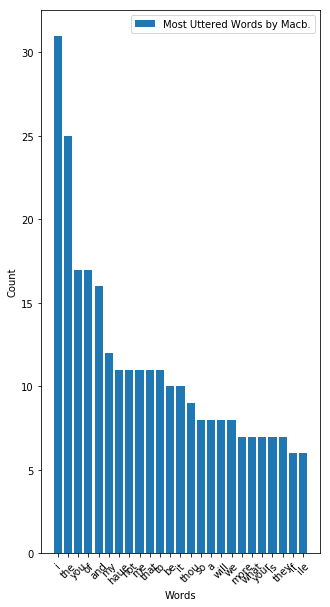

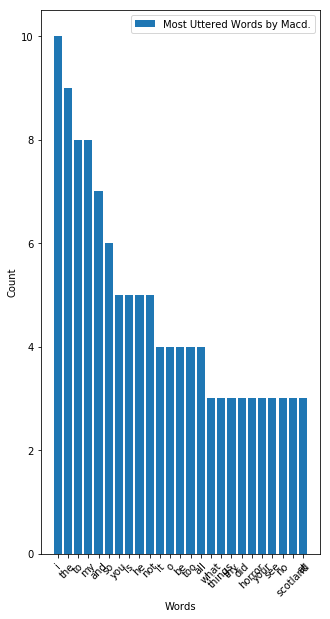

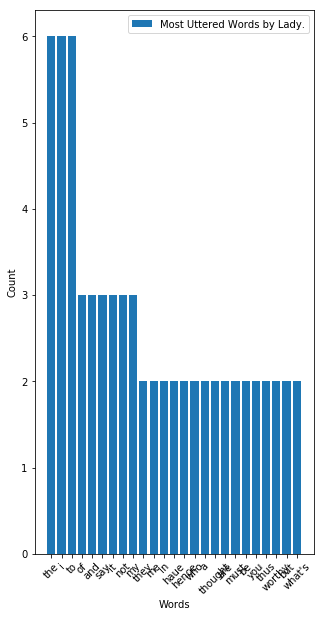

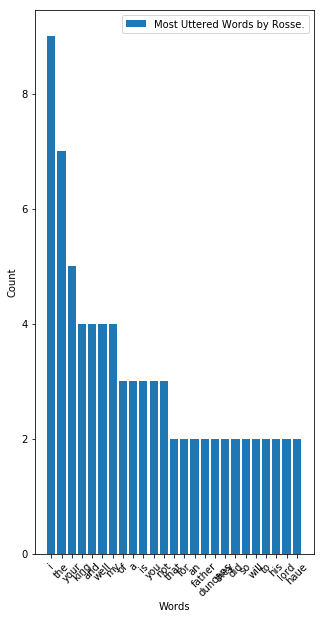

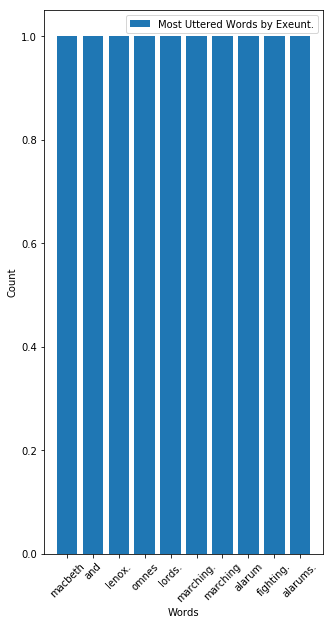

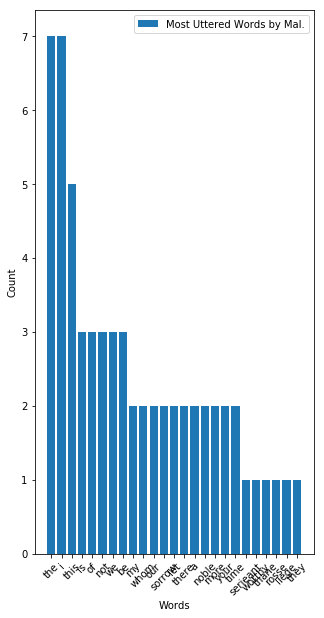

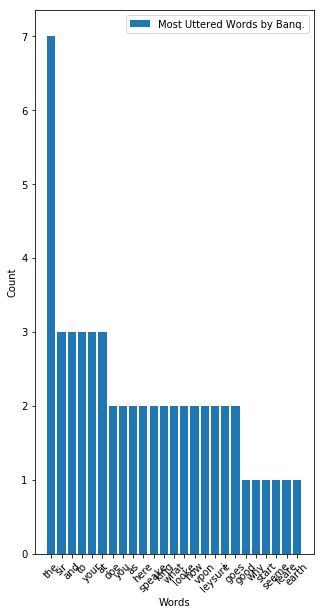

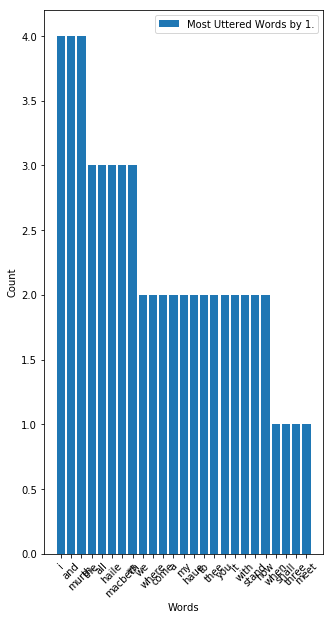

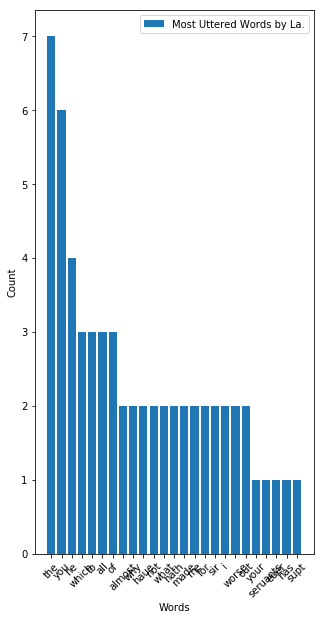

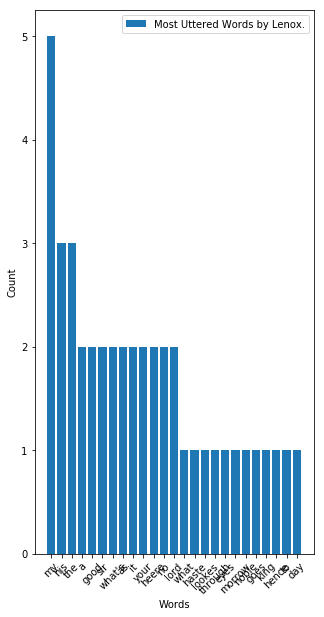

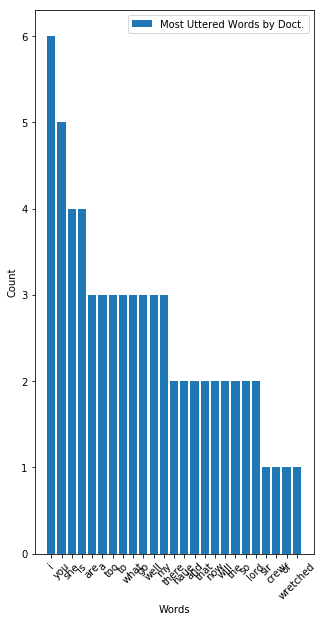

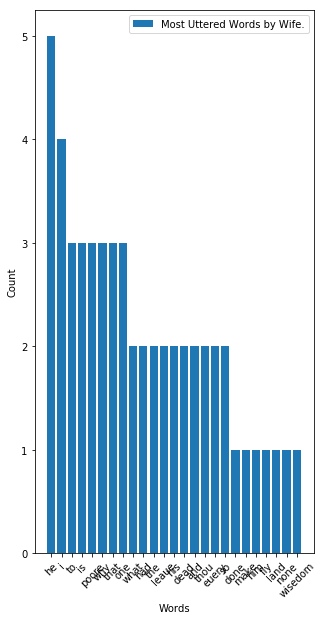

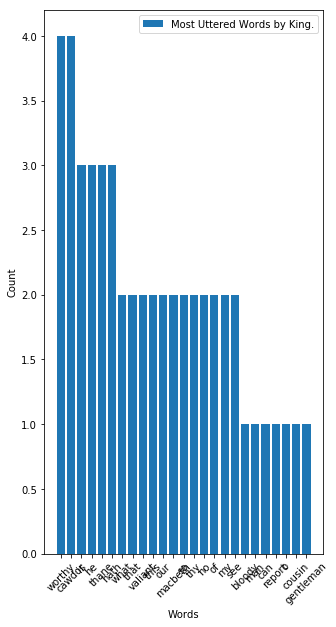

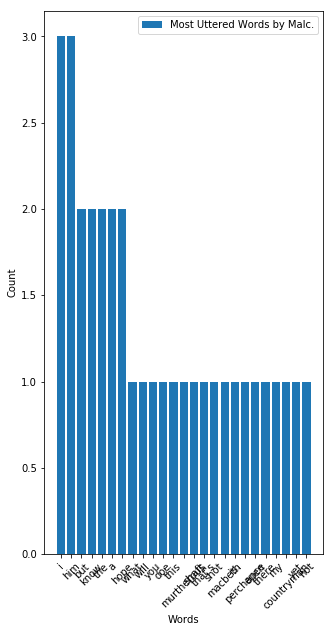

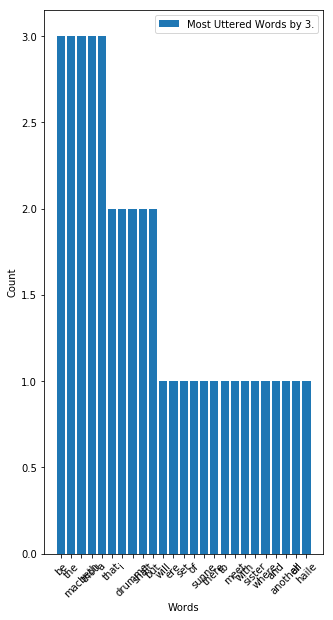

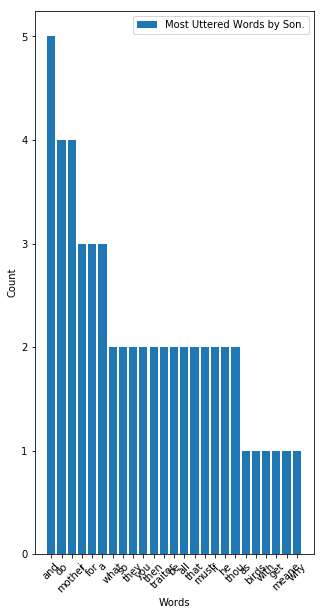

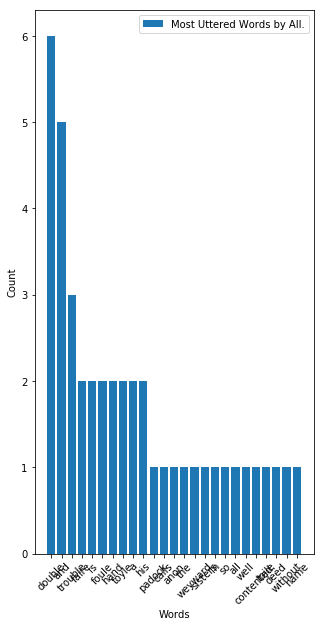

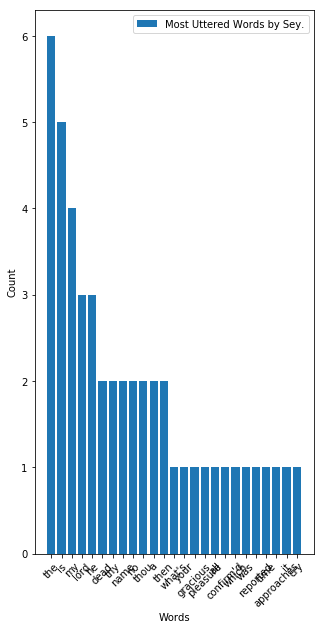

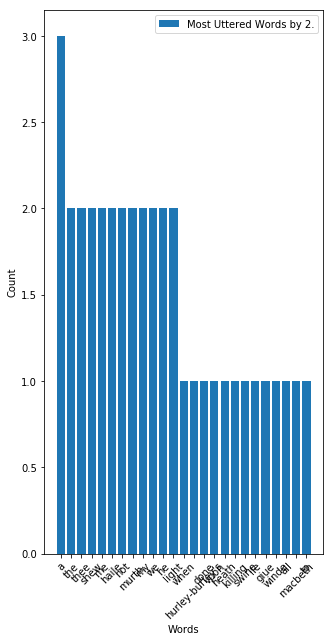

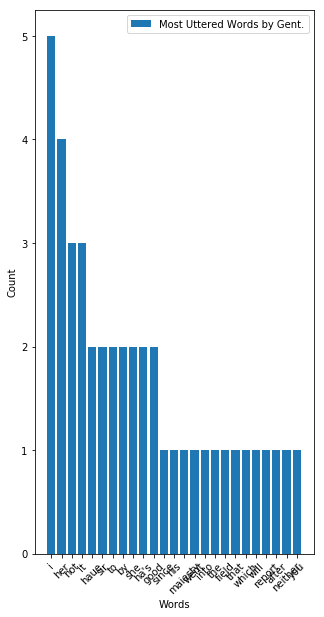

In [ ]:
for character, dialogue in words_by_name.items():
    plt.figure(figsize=(10,10))
    x_values = list(map(lambda k: k[0], dialogue))
    y_values = list(map(lambda k: k[1], dialogue))
    # print(x_values)
    # print(y_values) 
    plt.bar(x_values[:25], y_values[:25], label=f"Most Uttered Words by {character}")
    plt.legend()
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure(figsize=(5,5))
# x_values = list(map(lambda k: k[0], words_by_name['Son.']))
# y_values = list(map(lambda k: k[1], words_by_name['Son.']))
# # print(x_values)
# # print(y_values) 
# plt.bar(x_values[:5], y_values[:5], label="Most Uttered Words by Son.")
# plt.legend()
# plt.xlabel("Words")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()